# Optimizing Medical Support Center Allocation During Natural Disasters

In [4]:
%pip install pyomo networkx pandas numpy matplotlib --upgrade

     ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
     ---- ----------------------------------- 0.2/2.0 MB 5.0 MB/s eta 0:00:01
     --------------- ------------------------ 0.8/2.0 MB 8.2 MB/s eta 0:00:01
     ---------------------------- ----------- 1.5/2.0 MB 10.4 MB/s eta 0:00:01
     ------------------------------------ --- 1.9/2.0 MB 10.9 MB/s eta 0:00:01
     ---------------------------------------- 2.0/2.0 MB 10.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
     -- ------------------------------------- 0.6/11.2 MB 19.5 MB/s eta 0:00:01
     ----- ---------------------------------- 1.5/11.2 MB 19.6 MB/s eta 0:00:01
     -------- ------------------------------- 2.5/11.2 MB 19.9 MB/s eta 0:00:01
     ------------- -------------------------- 3.7/11.2 MB 21.6 MB/s eta 0:00:01
     ------------- -------------------------- 3.9/11.2 MB 22.4 MB/s eta 0:00:01
     ----------------- ---------------------- 5.0/11.2 MB 18.7 M

In [5]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import numpy as np
import random 
import networkx as nx
import pandas as pd

In [9]:
# Reading the "node" CSV file into a pandas DataFrame
df = pd.read_csv('node.csv')

# Displaying the DataFrame
df.head(5)

,node,X,Y
0,1,690309,1976022
1,2,683649,1973025
2,3,693306,1963368
3,4,686313,1958373
4,5,696636,1946718


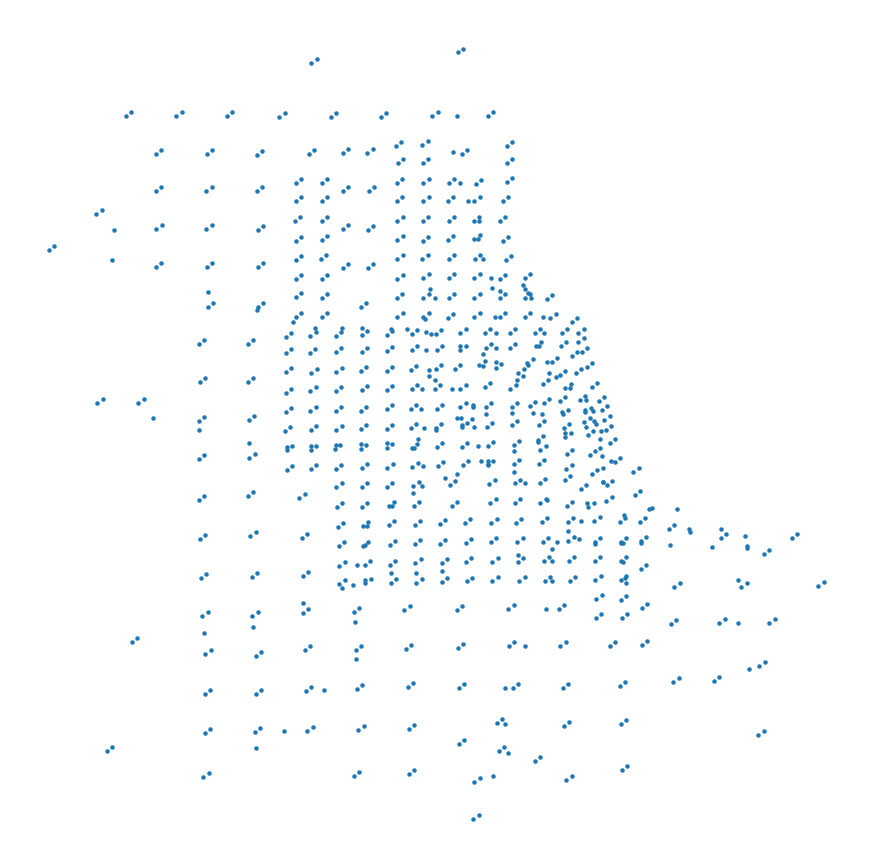

In [10]:
# Creating a scatter plot using the matplotlib library
plt.figure(figsize=(11,11))
plt.scatter(df['X'],df['Y'],s=5)

# Turning off the axis labels
plt.axis('off')

# Saving the plot as a PNG file
plt.savefig('base'+  ' .png', format='png', dpi=200)

In [12]:
# Reading another CSV file, "net" into a DataFrame
net = pd.read_csv('net.csv')

# Displaying the DataFrame
net.head(5)

,f,t,cap,L,ftime,b,power,speed,toll,link_type,;
0,1,547,49500,0.86267,0.0,0.15,4,0,0,3,;
1,2,548,49500,0.86267,0.0,0.15,4,0,0,3,;
2,3,549,49500,0.86267,0.0,0.15,4,0,0,3,;
3,4,550,49500,0.86267,0.0,0.15,4,0,0,3,;
4,5,551,49500,0.86267,0.0,0.15,4,0,0,3,;


In [24]:
# create an empty Graph object from the NetworkX library
G = nx.Graph()

# create an empty dictionary called 'population'
population = {}

# loop through each node in the 'df' DataFrame and set a random population size
for n in df['node']:
    population[n] = 50*random.randint(10,200)

# create empty dictionaries called 'connect' and 'dist'
connect = {}
dist = {}

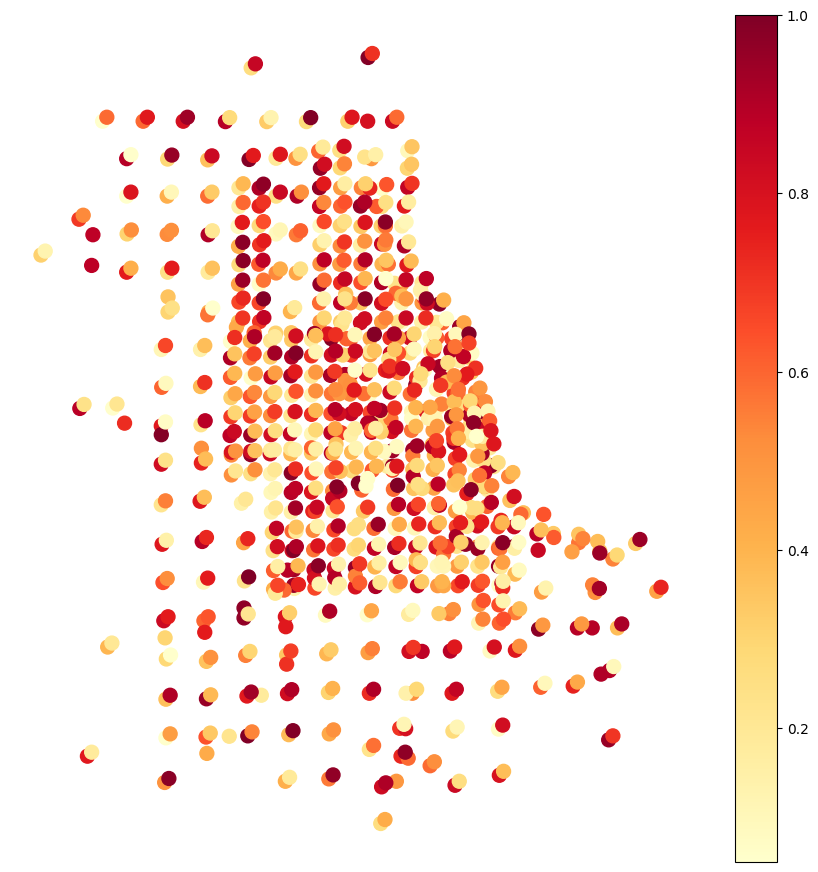

In [26]:
# Extract population size for each node from population dictionary
df['pop'] = [population[n] for n in population]

# Scale population size to range between 0 and 1
df['pop_scaled'] = df['pop'] / df['pop'].max()

# Create scatter plot with colormap based on population size
plt.figure(figsize=(11,11))
plt.scatter(df['X'], df['Y'], s=100, c=df['pop_scaled'], cmap='YlOrRd')

# Turn off axis and add colorbar to the plot
plt.axis('off')
plt.colorbar()

# Save the plot as png file
plt.savefig('base pop.png', format='png', dpi=200)